In [1]:
# Data fetched from https://www.kaggle.com/datasets/simonaasm/world-happiness-index-by-reports-2013-2023?select=World+Happiness+Index+by+Reports+2013-2023+no+nulls.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df18 = pd.read_csv('2018.csv')

In [4]:
df19 = pd.read_csv('2019.csv')

In [5]:
df20 = pd.read_csv('2020.csv')

In [6]:
print(df18.columns)
print(df19.columns)
print(df20.columns)

df_names = {'df18': 2018,
           'df19': 2019,
           'df20': 2020}

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Gene

In [7]:
common_columns = set(df18.columns)  # Start with the columns from the first DataFrame

# Use set intersection to find common columns
for df in [df19, df20]:
    common_columns = common_columns.intersection(df.columns)

# Print the common column names
print("Common columns across all years:")
for column in common_columns:
    print(column)

Common columns across all years:
Generosity
Healthy life expectancy
Social support
Freedom to make life choices
Perceptions of corruption


In [8]:
for name, df in zip(df_names.values(), [df18, df19, df20]):
    print(f"DataFrame Name: {name}")

    # Perform operations on the DataFrame
    print(df.isnull().sum())
    print()

DataFrame Name: 2018
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

DataFrame Name: 2019
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

DataFrame Name: 2020
Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GD

In [9]:
print(df18.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

In [10]:
print(df20.head())

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559  

In [11]:
columns_to_drop = ['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual', 'Ladder score in Dystopia', 'upperwhisker', 'lowerwhisker', 'Standard error of ladder score'] 
df20 = df20.drop(columns = columns_to_drop)

In [12]:
print(df20.head())

  Country name Regional indicator  Ladder score  Logged GDP per capita  \
0      Finland     Western Europe        7.8087              10.639267   
1      Denmark     Western Europe        7.6456              10.774001   
2  Switzerland     Western Europe        7.5599              10.979933   
3      Iceland     Western Europe        7.5045              10.772559   
4       Norway     Western Europe        7.4880              11.087804   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0        0.954330                71.900825                      0.949172   
1        0.955991                72.402504                      0.951444   
2        0.942847                74.102448                      0.921337   
3        0.974670                73.000000                      0.948892   
4        0.952487                73.200783                      0.955750   

   Generosity  Perceptions of corruption  
0   -0.059482                   0.195445  
1    0.06620

In [13]:
# Rename some columns to synthesize the columns of three datasets.
df18.rename(columns={'Country or region':'Country name', 'Score':'Ladder score', 'GDP per capita': 'Logged GDP per capita'}, inplace = True)
df18 = df18.drop(columns = 'Overall rank', axis = 1)

In [14]:
print(df18.head())

  Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland         7.632                  1.305           1.592   
1       Norway         7.594                  1.456           1.582   
2      Denmark         7.555                  1.351           1.590   
3      Iceland         7.495                  1.343           1.644   
4  Switzerland         7.487                  1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3               

In [15]:
df19.rename(columns={'Country or region':'Country name', 'Score':'Ladder score', 'GDP per capita': 'Logged GDP per capita'}, inplace = True)
df19 = df19.drop(columns = 'Overall rank', axis = 1)

In [16]:
print(df19.head())

  Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland         7.769                  1.340           1.587   
1      Denmark         7.600                  1.383           1.573   
2       Norway         7.554                  1.488           1.582   
3      Iceland         7.494                  1.380           1.624   
4  Netherlands         7.488                  1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3               

In [17]:
# Print out common columns' titles.

common_columns = set(df18.columns)  # Start with the columns from the first DataFrame

# Use set intersection to find common columns
for df in [df19, df20]:
    common_columns = common_columns.intersection(df.columns)

# Print the common column names
# print("Common columns across all years:")
# for column in common_columns:
#     print(column)

common_columns

{'Country name',
 'Freedom to make life choices',
 'Generosity',
 'Healthy life expectancy',
 'Ladder score',
 'Logged GDP per capita',
 'Perceptions of corruption',
 'Social support'}

## Exercise 1

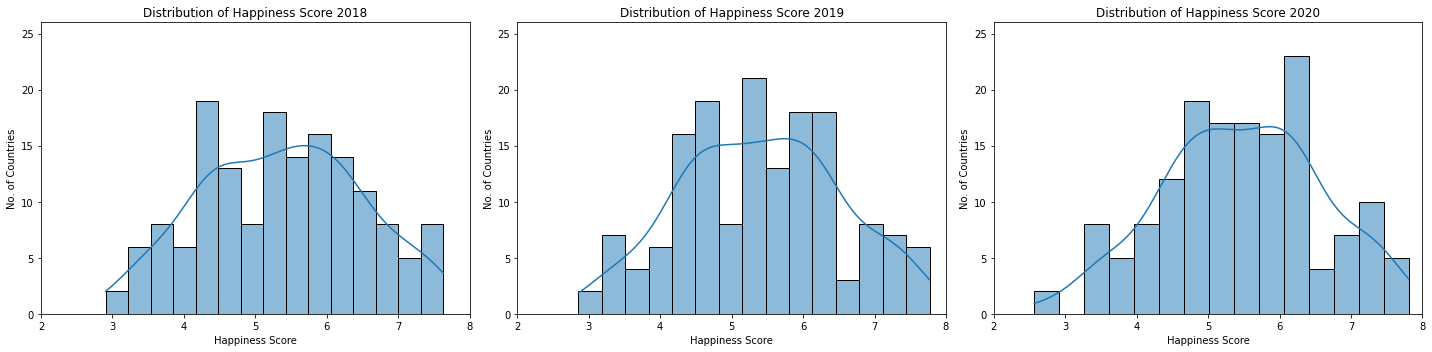

In [18]:
# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the histograms for each year on separate subplots
sns.histplot(df18['Ladder score'], bins=15, kde=True, ax=axs[0])
axs[0].set_xlabel('Happiness Score')
axs[0].set_ylabel('No. of Countries')
axs[0].set_title('Distribution of Happiness Score 2018')
axs[0].set_ylim(0, 26)
axs[0].set_xlim(2, 8)

sns.histplot(df19['Ladder score'], bins=15, kde=True, ax=axs[1])
axs[1].set_xlabel('Happiness Score')
axs[1].set_ylabel('No. of Countries')
axs[1].set_title('Distribution of Happiness Score 2019')
axs[1].set_ylim(0, 26)
axs[1].set_xlim(2, 8)

sns.histplot(df20['Ladder score'], bins=15, kde=True, ax=axs[2])
axs[2].set_xlabel('Happiness Score')
axs[2].set_ylabel('No. of Countries')
axs[2].set_title('Distribution of Happiness Score 2020')
axs[2].set_ylim(0, 26)
axs[2].set_xlim(2, 8)

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

Analysis:
1. The histogram resembles normal distribution in each country, with most countries having happiness score around 5 or 6.
2. We can see the upward trend for the score, where more countries having higher scores over time.

## Exercise 2

### The whole aspects

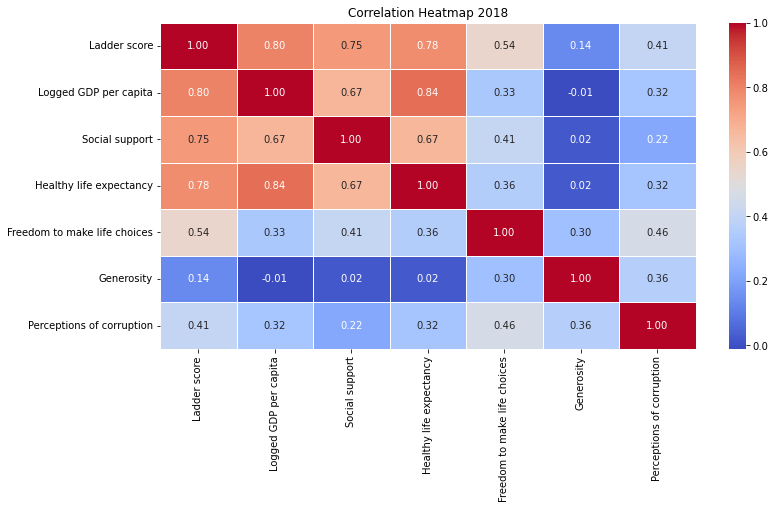

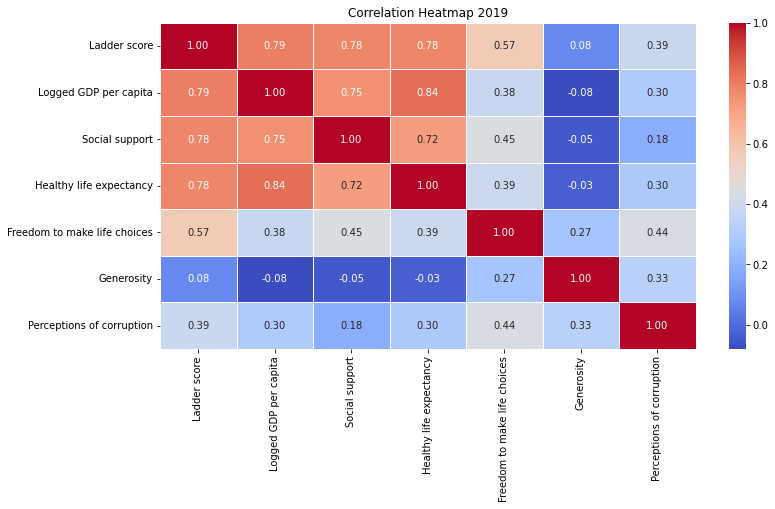

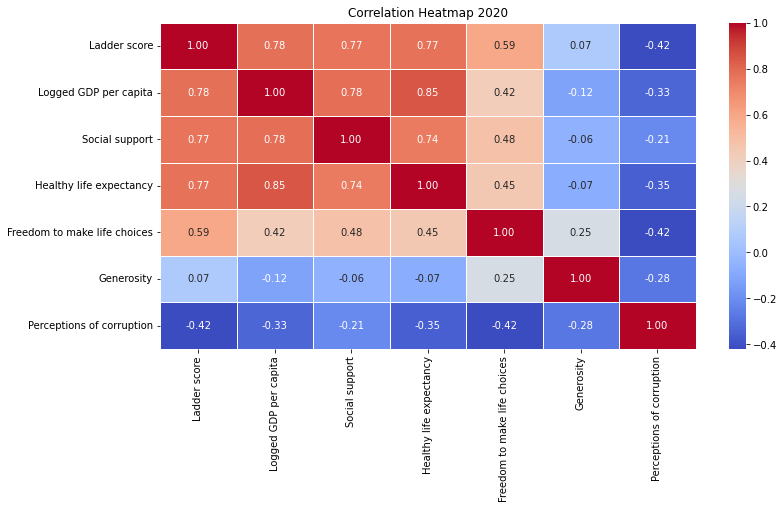

In [19]:
# Correlation heatmap

for name, df in zip(df_names.values(), [df18, df19, df20]):
    plt.figure(figsize = (12, 6))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
    plt.title(f'Correlation Heatmap {name}')
    plt.show()

### Four aspects: Ladder score, Logged GDP per capita, Social support, Healthy life expectancy

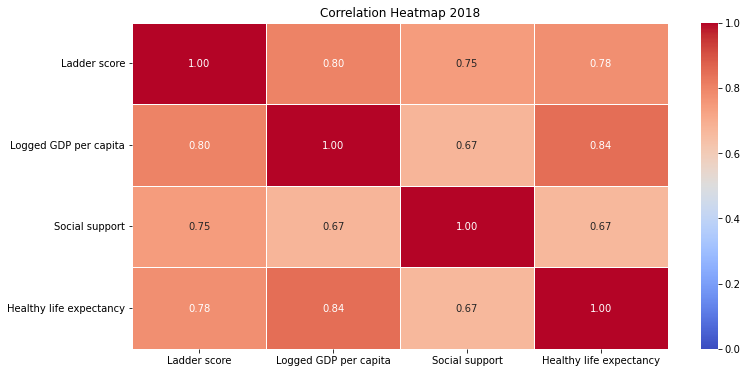

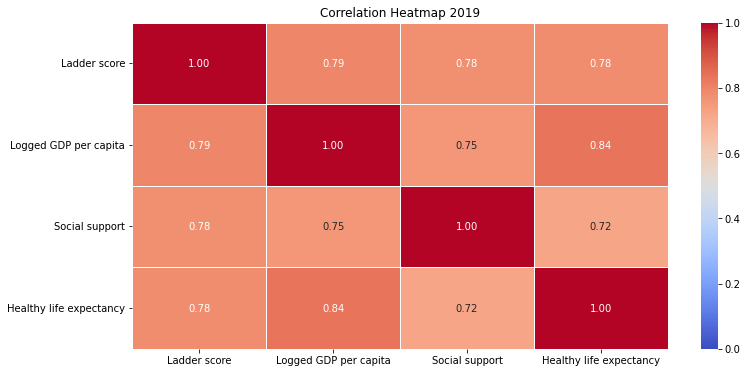

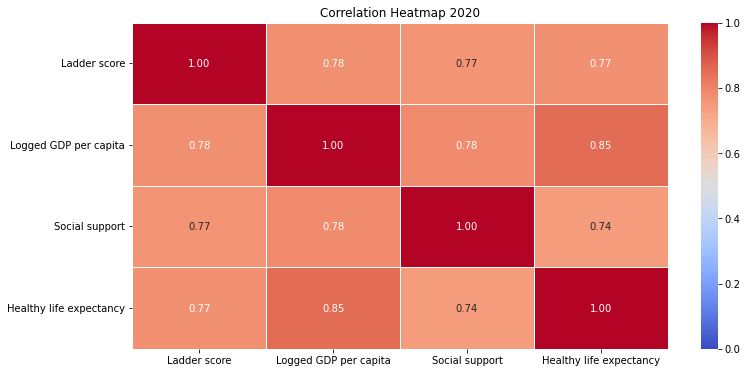

In [20]:
# Correlation heatmap
columns_corr = ['Ladder score', 'Logged GDP per capita', 'Social support' , 'Healthy life expectancy']

for name, df in zip(df_names.values(), [df18, df19, df20]):
    plt.figure(figsize = (12, 6))
    correlation_matrix = df[columns_corr].corr()
    sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5, vmin=0, vmax=1)
    plt.title(f'Correlation Heatmap {name}')
    plt.show()

Analysis:
These aspects are fairly correlated to each other, with Logged GDP per capita being most correlated to ladder score.

In [21]:
df18['year'] = 2018
df19['year'] = 2019
df20['year'] = 2020

# Combine the DataFrames into one
combined_df = pd.concat([df18, df19, df20], ignore_index=True)

combined_df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Finland,7.6320,1.305000,1.592000,0.874000,0.681000,0.202000,0.393000,2018,NaN
1,Norway,7.5940,1.456000,1.582000,0.861000,0.686000,0.286000,0.340000,2018,NaN
2,Denmark,7.5550,1.351000,1.590000,0.868000,0.683000,0.284000,0.408000,2018,NaN
3,Iceland,7.4950,1.343000,1.644000,0.914000,0.677000,0.353000,0.138000,2018,NaN
4,Switzerland,7.4870,1.420000,1.549000,0.927000,0.660000,0.256000,0.357000,2018,NaN
...,...,...,...,...,...,...,...,...,...,...
460,Central African Republic,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,2020,Sub-Saharan Africa
461,Rwanda,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,2020,Sub-Saharan Africa
462,Zimbabwe,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,2020,Sub-Saharan Africa
463,South Sudan,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,2020,Sub-Saharan Africa


In [22]:
combined_df = combined_df.sort_values(by = ['Country name', 'year'], ascending = True).reset_index(drop = True)
combined_df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Afghanistan,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,2018,NaN
1,Afghanistan,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,2019,NaN
2,Afghanistan,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,2020,South Asia
3,Albania,4.5860,0.916000,0.817000,0.790000,0.419000,0.149000,0.032000,2018,NaN
4,Albania,4.7190,0.947000,0.848000,0.874000,0.383000,0.178000,0.027000,2019,NaN
...,...,...,...,...,...,...,...,...,...,...
460,Zambia,4.1070,0.578000,1.058000,0.426000,0.431000,0.247000,0.087000,2019,NaN
461,Zambia,3.7594,8.224720,0.698824,55.299377,0.806500,0.078037,0.801290,2020,Sub-Saharan Africa
462,Zimbabwe,3.6920,0.357000,1.094000,0.248000,0.406000,0.132000,0.099000,2018,NaN
463,Zimbabwe,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,2019,NaN


In [23]:
combined_df['Average Ladder score'] = combined_df.groupby('Country name')['Ladder score'].transform('mean')

combined_df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator,Average Ladder score
0,Afghanistan,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,2018,NaN,3.133967
1,Afghanistan,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,2019,NaN,3.133967
2,Afghanistan,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,2020,South Asia,3.133967
3,Albania,4.5860,0.916000,0.817000,0.790000,0.419000,0.149000,0.032000,2018,NaN,4.729233
4,Albania,4.7190,0.947000,0.848000,0.874000,0.383000,0.178000,0.027000,2019,NaN,4.729233
...,...,...,...,...,...,...,...,...,...,...,...
460,Zambia,4.1070,0.578000,1.058000,0.426000,0.431000,0.247000,0.087000,2019,NaN,4.081133
461,Zambia,3.7594,8.224720,0.698824,55.299377,0.806500,0.078037,0.801290,2020,Sub-Saharan Africa,4.081133
462,Zimbabwe,3.6920,0.357000,1.094000,0.248000,0.406000,0.132000,0.099000,2018,NaN,3.551400
463,Zimbabwe,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,2019,NaN,3.551400


# Exercise 3

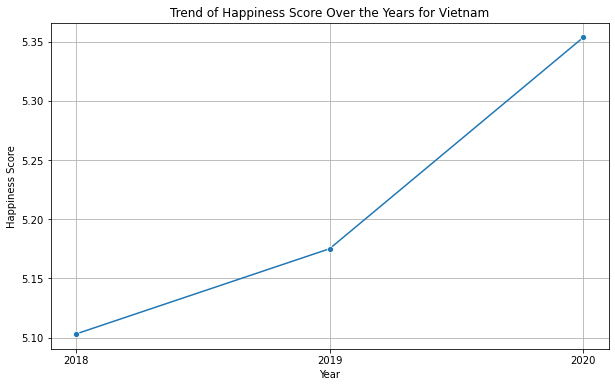

In [24]:
country_name = 'Vietnam'

country_data = combined_df[combined_df['Country name'] == country_name]

plt.figure(figsize=(10,6))
sns.lineplot(data=country_data, x = 'year', y = 'Ladder score', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title(f'Trend of Happiness Score Over the Years for {country_name}')
plt.grid(True)

plt.xticks(range(min(combined_df['year']), max(combined_df['year']) + 1, 1))
plt.show()

#### Analysis
Vietnam saw increasing trend in happiness score over the period witnessed.
This can be attributed to increasing economic power in the country that leads to improvement in other aspects in life.

# Exercise 4

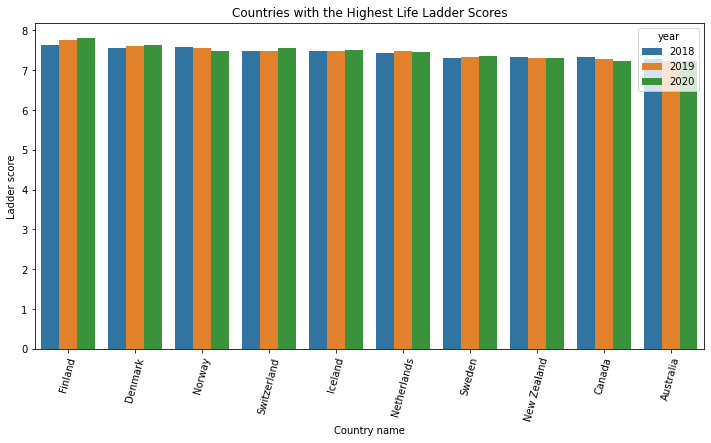

In [25]:
sorted_data = combined_df.sort_values(by='Average Ladder score', ascending=False)

# Select the top rows (e.g., top 10)
top_countries = sorted_data.head(30)

plt.figure(figsize=(12,6))
sns.barplot(x='Country name', y='Ladder score', hue='year', data=top_countries)
plt.xticks(rotation=75)
plt.ylabel('Ladder score')
plt.xlabel('Country name')
plt.title('Countries with the Highest Life Ladder Scores')
plt.show()

Analysis:
1. The top 10 countries had happiness scores hovering around 7.3 to 7.8.
2. All these countries are developed countries, with most of them being in Western European and Scanadavian countries.
3. The 3 years witness different trends, about half decreasing and half increasing in ladder scores.

In [ ]:
# country_data_1 = combined_df[combined_df['Country name'] == 'Zimbabwe']
# country_data_1

In [ ]:
# country_data_1 = combined_df[combined_df['Country name'] == 'Syria']
# country_data_1

In [ ]:
# print(sorted_data.tail(10))

## Countries with lowest Life Ladder Scores

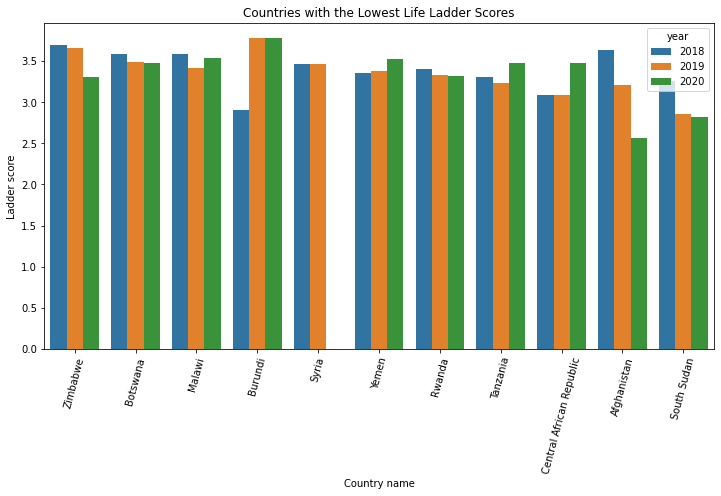

In [30]:
sorted_data = combined_df.sort_values(by='Average Ladder score', ascending=False)
lowest_score_countries = sorted_data.tail(32)

plt.figure(figsize=(12,6))
sns.barplot(x='Country name', y='Ladder score', hue='year', data=lowest_score_countries)
plt.xticks(rotation=75)
plt.ylabel('Ladder score')
plt.xlabel('Country name')
plt.title('Countries with the Lowest Life Ladder Scores')
plt.show()


Analysis:
1. The score ranges from 3 to 3.5, about half of that compared to the top countries.
2. Most countries are underdeveloped or developing countries, many of which are in Africa, having underdeveloped economies and social unrest.